### Required Codio Assignment 3.4: Combining Data Analysis Techniques

**Expected Time**: 120 Minutes

**Total Points**: 10

This assignment aims to put together our work from module 3.  You are to explore a dataset dealing with customer churn.  Exploratory plots and split-apply-combine techniques will be the main focus of the investigation with the impetus being to identify drivers of customer churn. Churn determines if a customer eliminated their subscription to the telecommunication company. 

#### Index:

- [Problem 1](#Problem-1:-Reading-in-the-Data)
- [Problem 2](#Problem-2:-Exploring-the-Missing-Data)
- [Problem 3](#Problem-3:-Investigating-Churn)
- [Problem 4](#Problem-4:-Plotting-Churn-with-Seaborn)
- [Problem 5](#Problem-5:-Churn-Across-all-Customers)
- [Problem 6](#Problem-1:-Churn-by-International-Plan)
- [Problem 7](#Problem-2:-Selecting-Specific-States)
- [Problem 8](#Problem-3:-International-Minutes-and-Churn)
- [Problem 9](#Problem-4:-pairplot-of-features)
- [Problem 10](#Problem-5:-Customer-Service-Calls-and-Churn)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

[Back to top](#Index:) 


### Problem 1: Reading in the Data

**1 Point**

Read in the dataset as a pandas DataFrame and assign your answer to `churn_df` below.  The dataset is located in the `data` folder and titled `cell_phone_churn.csv`.

In [2]:
### GRADED

churn_df = None

### BEGIN SOLUTION
churn_df = pd.read_csv('data/cell_phone_churn.csv')
### END SOLUTION

# Answer check
print(type(churn_df))
churn_df.head()

<class 'pandas.core.frame.DataFrame'>


,state,account_length,area_code,intl_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


[Back to top](#Index:) 


### Problem 2: Exploring the Missing Data

**1 Point**

Use the `.isnull()` method together with the `.sum()` method on the DataFrame `churn_df` determine how many missing values are in each column.  Assign your solution as a pandas Series to `missing_vals` below.

In [3]:
### GRADED

missing_vals = None

### BEGIN SOLUTION
missing_vals = churn_df.isnull().sum()
### END SOLUTION

# Answer check
print(type(missing_vals))
missing_vals

<class 'pandas.core.series.Series'>


state             0
account_length    0
area_code         0
intl_plan         0
vmail_plan        0
vmail_message     0
day_mins          0
day_calls         0
day_charge        0
eve_mins          0
eve_calls         0
eve_charge        0
night_mins        0
night_calls       0
night_charge      0
intl_mins         0
intl_calls        0
intl_charge       0
custserv_calls    0
churn             0
dtype: int64

[Back to top](#Index:) 


### Problem 3: Investigating Churn

**1 Point**

Use the `.value_counts()` method on the `churn` column of `churn_df` to determine the *percent* (value between 0 and 1) of customers churned and not in the dataset.  Inside `.value_counts()` set the argument `normalize` equal to `True`. Assign your results as a pandas Series to `churn_pct` below.  

In [4]:
### GRADED

churn_pct = None

### BEGIN SOLUTION
churn_pct = churn_df['churn'].value_counts(normalize = True)
### END SOLUTION

# Answer check
print(type(churn_pct))
churn_pct

<class 'pandas.core.series.Series'>


churn
False    0.855086
True     0.144914
Name: proportion, dtype: float64

[Back to top](#Index:) 


### Problem 4: Plotting Churn with Seaborn

**1 Point**

Use seaborn's `countplot()` on the `churn` column of `churn_df` to visualize the counts of customers churned and not churned.  Save your image as `churn_count.png` to the `images` folder.

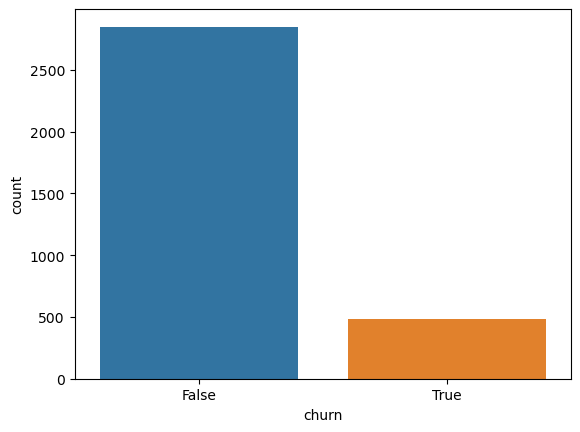

In [5]:
### GRADED

### BEGIN SOLUTION
sns.countplot(data = churn_df, x = 'churn')
plt.savefig('images/churn_count.png')
### END SOLUTION

[Back to top](#Index:) 


### Problem 5: Churn Across all Customers

**1 Point**

Based on your results from Problems 3 and 4, are most customers churned or do most stay with the company? 

Assign a boolean of `True` if most are churned and `False` if most stay with the company to the variable `most_churn` below.

In [6]:
### GRADED

most_churn = None

### BEGIN SOLUTION
most_churn = False
### END SOLUTION
print(type(most_churn))
most_churn

<class 'bool'>


False

[Back to top](#Index:) 


### Problem 6: Churn by International Plan

**1 Point**

Use the `groupby` method on the `churn_df` DataFrame to group the `intl_plan` column. Use a double square bracket notation to apply this grouping to the column `churn`. Finally, use the function `mean()` to compute the average churn for each group and assign your response as a DataFrame to `intl_churn` below.  

In [7]:
### GRADED

intl_churn = None

### BEGIN SOLUTION
intl_churn = churn_df.groupby('intl_plan')[['churn']].mean()
### END SOLUTION
print(type(intl_churn))
intl_churn

<class 'pandas.core.frame.DataFrame'>


,churn
intl_plan,
no,0.114950
yes,0.424149


[Back to top](#Index:) 


### Problem 7: Selecting Specific States

**1 Point**

Subset the data to the following five states using the `query` method.  Use the resulting subset to determine the percent churned for each state using the `groupby` method.  Which state had the highest churn rate?  Assign your answer as a string with the two letter abbreviation from the list `states` to `most_churn_ne` below.

```python
states = ['NY', 'MA', 'CT', 'NH', 'ME']
```

In [11]:
state = ['NY', 'MA', 'CT', 'NH', 'ME']

In [15]:
### explore the data here


In [12]:
### GRADED

most_churn_ne = None

### BEGIN SOLUTION
ne = churn_df.query('state in @states')
ans = ne.groupby('state')[['churn']].mean().sort_values(by = 'churn', ascending = False)
most_churn_ne = 'ME'
### END SOLUTION
print(type(most_churn_ne))
most_churn_ne

<class 'str'>


'ME'

[Back to top](#Index:) 


### Problem 8: International Minutes and Churn

**1 Point**

Use the Seaborn function `histplot` to create histograms of the `intl_mins` column with `hue` equal to `churn`.  Save your plot as `intl_mins.png` to the `images` folder.  

Do you think international minutes determine customer churn?  Assign your answer as a string -- `yes` or `no` -- to `intl_min_churn` below.

<class 'str'>


'no'

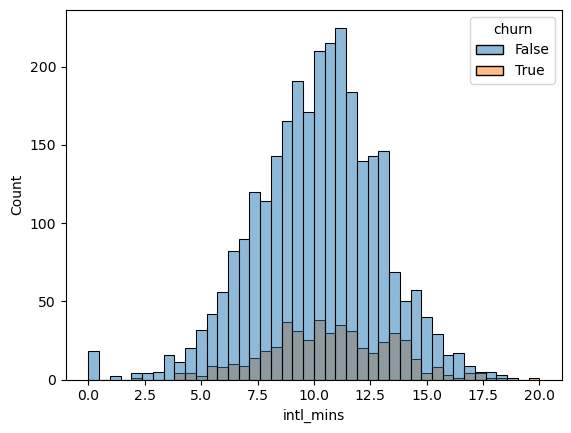

In [13]:
### GRADED
#make your histogram

intl_min_churn = None

### BEGIN SOLUTION
intl_min_churn = 'no'
sns.histplot(data = churn_df, x = 'intl_mins', hue = 'churn')
plt.savefig('images/intl_mins.png')
### END SOLUTION
print(type(intl_min_churn))
intl_min_churn

[Back to top](#Index:) 


### Problem 9: `pairplot` of features

**1 Point**

Use the columns `['night_calls', 'night_charge', 'intl_mins', 'intl_calls', 'intl_charge', 'custserv_calls', 'churn']` to produce a seaborn `pairplot` with `hue` equal to `churn`.  Save your image to `pairplot.png` in the `images` folder.  

c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


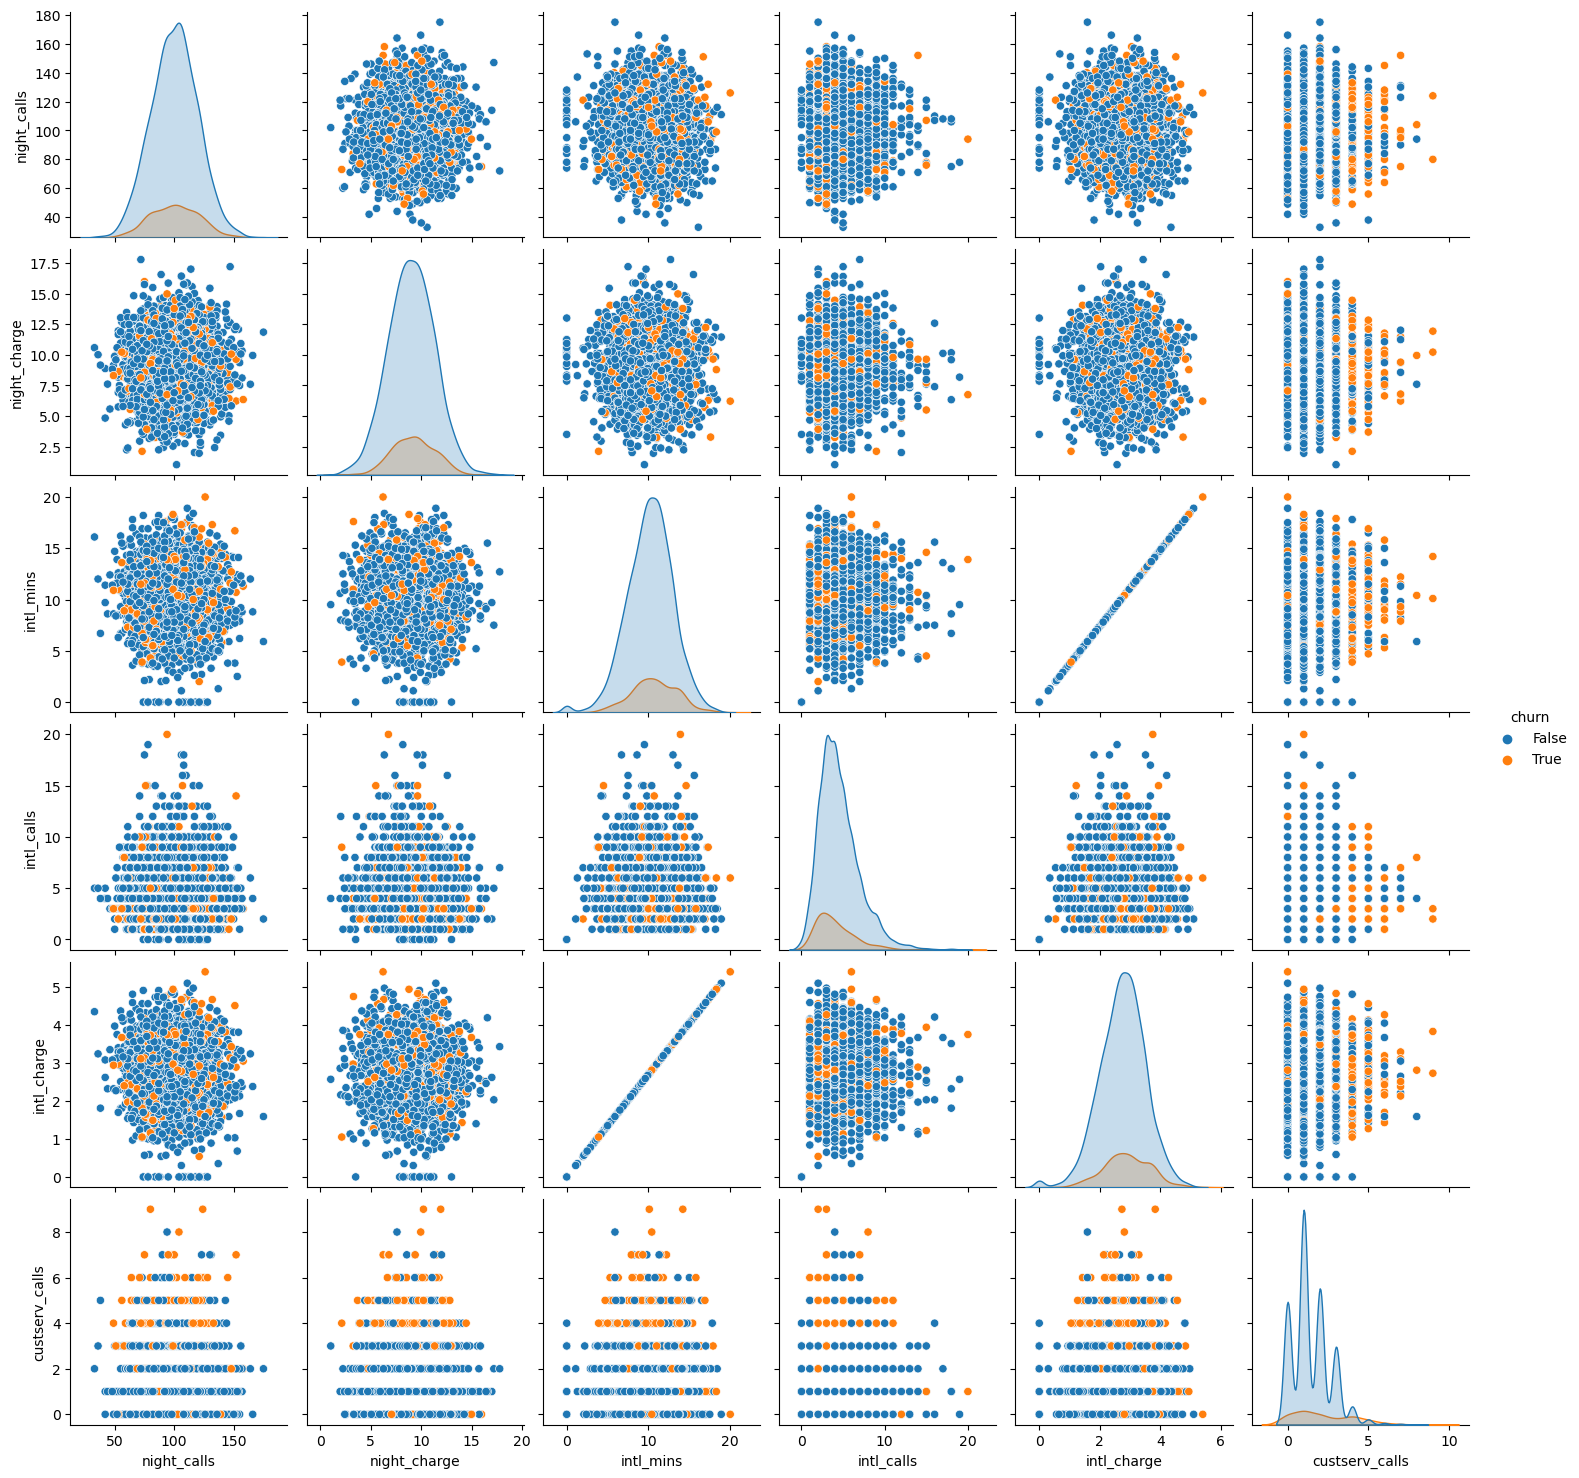

In [14]:
### GRADED

#make your pairplot

### BEGIN SOLUTION
sns.pairplot(churn_df[['night_calls', 'night_charge', 'intl_mins', 
                       'intl_calls', 'intl_charge', 'custserv_calls', 'churn']], hue = 'churn')
plt.savefig('images/pairplot.png.png')
### END SOLUTION

[Back to top](#Index:) 


### Problem 10: Customer Service Calls and Churn

**1 Point**

Use the `groupby` method to split the data by customers who had more than 4 customer service calls.  Use the `mean()` function to determine the average churn rate for each of the groups and assign your result as a DataFrame to `cust_service_churn` below.

In [15]:
### GRADED

cust_service_churn = None

### BEGIN SOLUTION
cust_service_churn = churn_df.groupby(churn_df['custserv_calls'] > 4)[['churn']].mean()
### END SOLUTION
print(type(cust_service_churn))
cust_service_churn

<class 'pandas.core.frame.DataFrame'>


,churn
custserv_calls,
False,0.130260
True,0.613861


It seems there are certain criteria where we find a larger percentage of customers churned based on this initial investigation.  Of course, there are many other ways to split, filter, and aggregate the data.  You are encouraged to further slice and dice the data to dig for more clues as to what drives customer churn.